# Identify Pneumothorax Disease in Chest X-rays

A pneumothorax is an abnormal collection of air in the pleural space between the lung and the chest wall [2]. This air pushes on the outside of the lung making it collapse. A pneumothorax can be a complete lung collapse or a collapse of only a portion of the lung [3]. The symptoms of a pneumothorax typically include sudden onset of sharp, one-sided chest pain and shortness of breath. A pneumothorax can be caused by a blunt or penetrating chest injury, certain medical procedures and damage from underlying lung disease. It may also occur for no obvious reason [2][3]. In some occasions, a pneumothorax can be a life-threatening condition [3].

A pneumothorax is generally diagnosed using a chest X-ray [4]. However, they can sometimes be difficult to confirm from chest X-rays[1].

The aim of this project is to predict the existence of a pneumothorax in a test image using a convolutional neural network and indicate the extent of the condition using binary masks and encode them using run-length-encoded (RLE) masks.

In [1]:
# Importing the libraries to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydicom
import os

from glob import glob
from collections import defaultdict

In [2]:
# Printing dataset directories.
dataset_path = "./dataset"
rles_path = "train-rle.csv"
print("The dataset folder has two directories:")
print(os.listdir(dataset_path))

# Import the training and testing data
train_set = sorted(glob(dataset_path + '/dicom-images-train/*/*/*.dcm'))
test_set = sorted(glob(dataset_path + '/dicom-images-test/*/*/*.dcm'))
rles = pd.read_csv(rles_path)

# Printing the number of images in the training and testing sets
print("\nThe training set has %d images." %(len(train_set)))
print("The Testing set has %d images." %(len(test_set)))

The dataset folder has two directories:
['dicom-images-test', 'dicom-images-train']

The training set has 10675 images.
The Testing set has 1372 images.


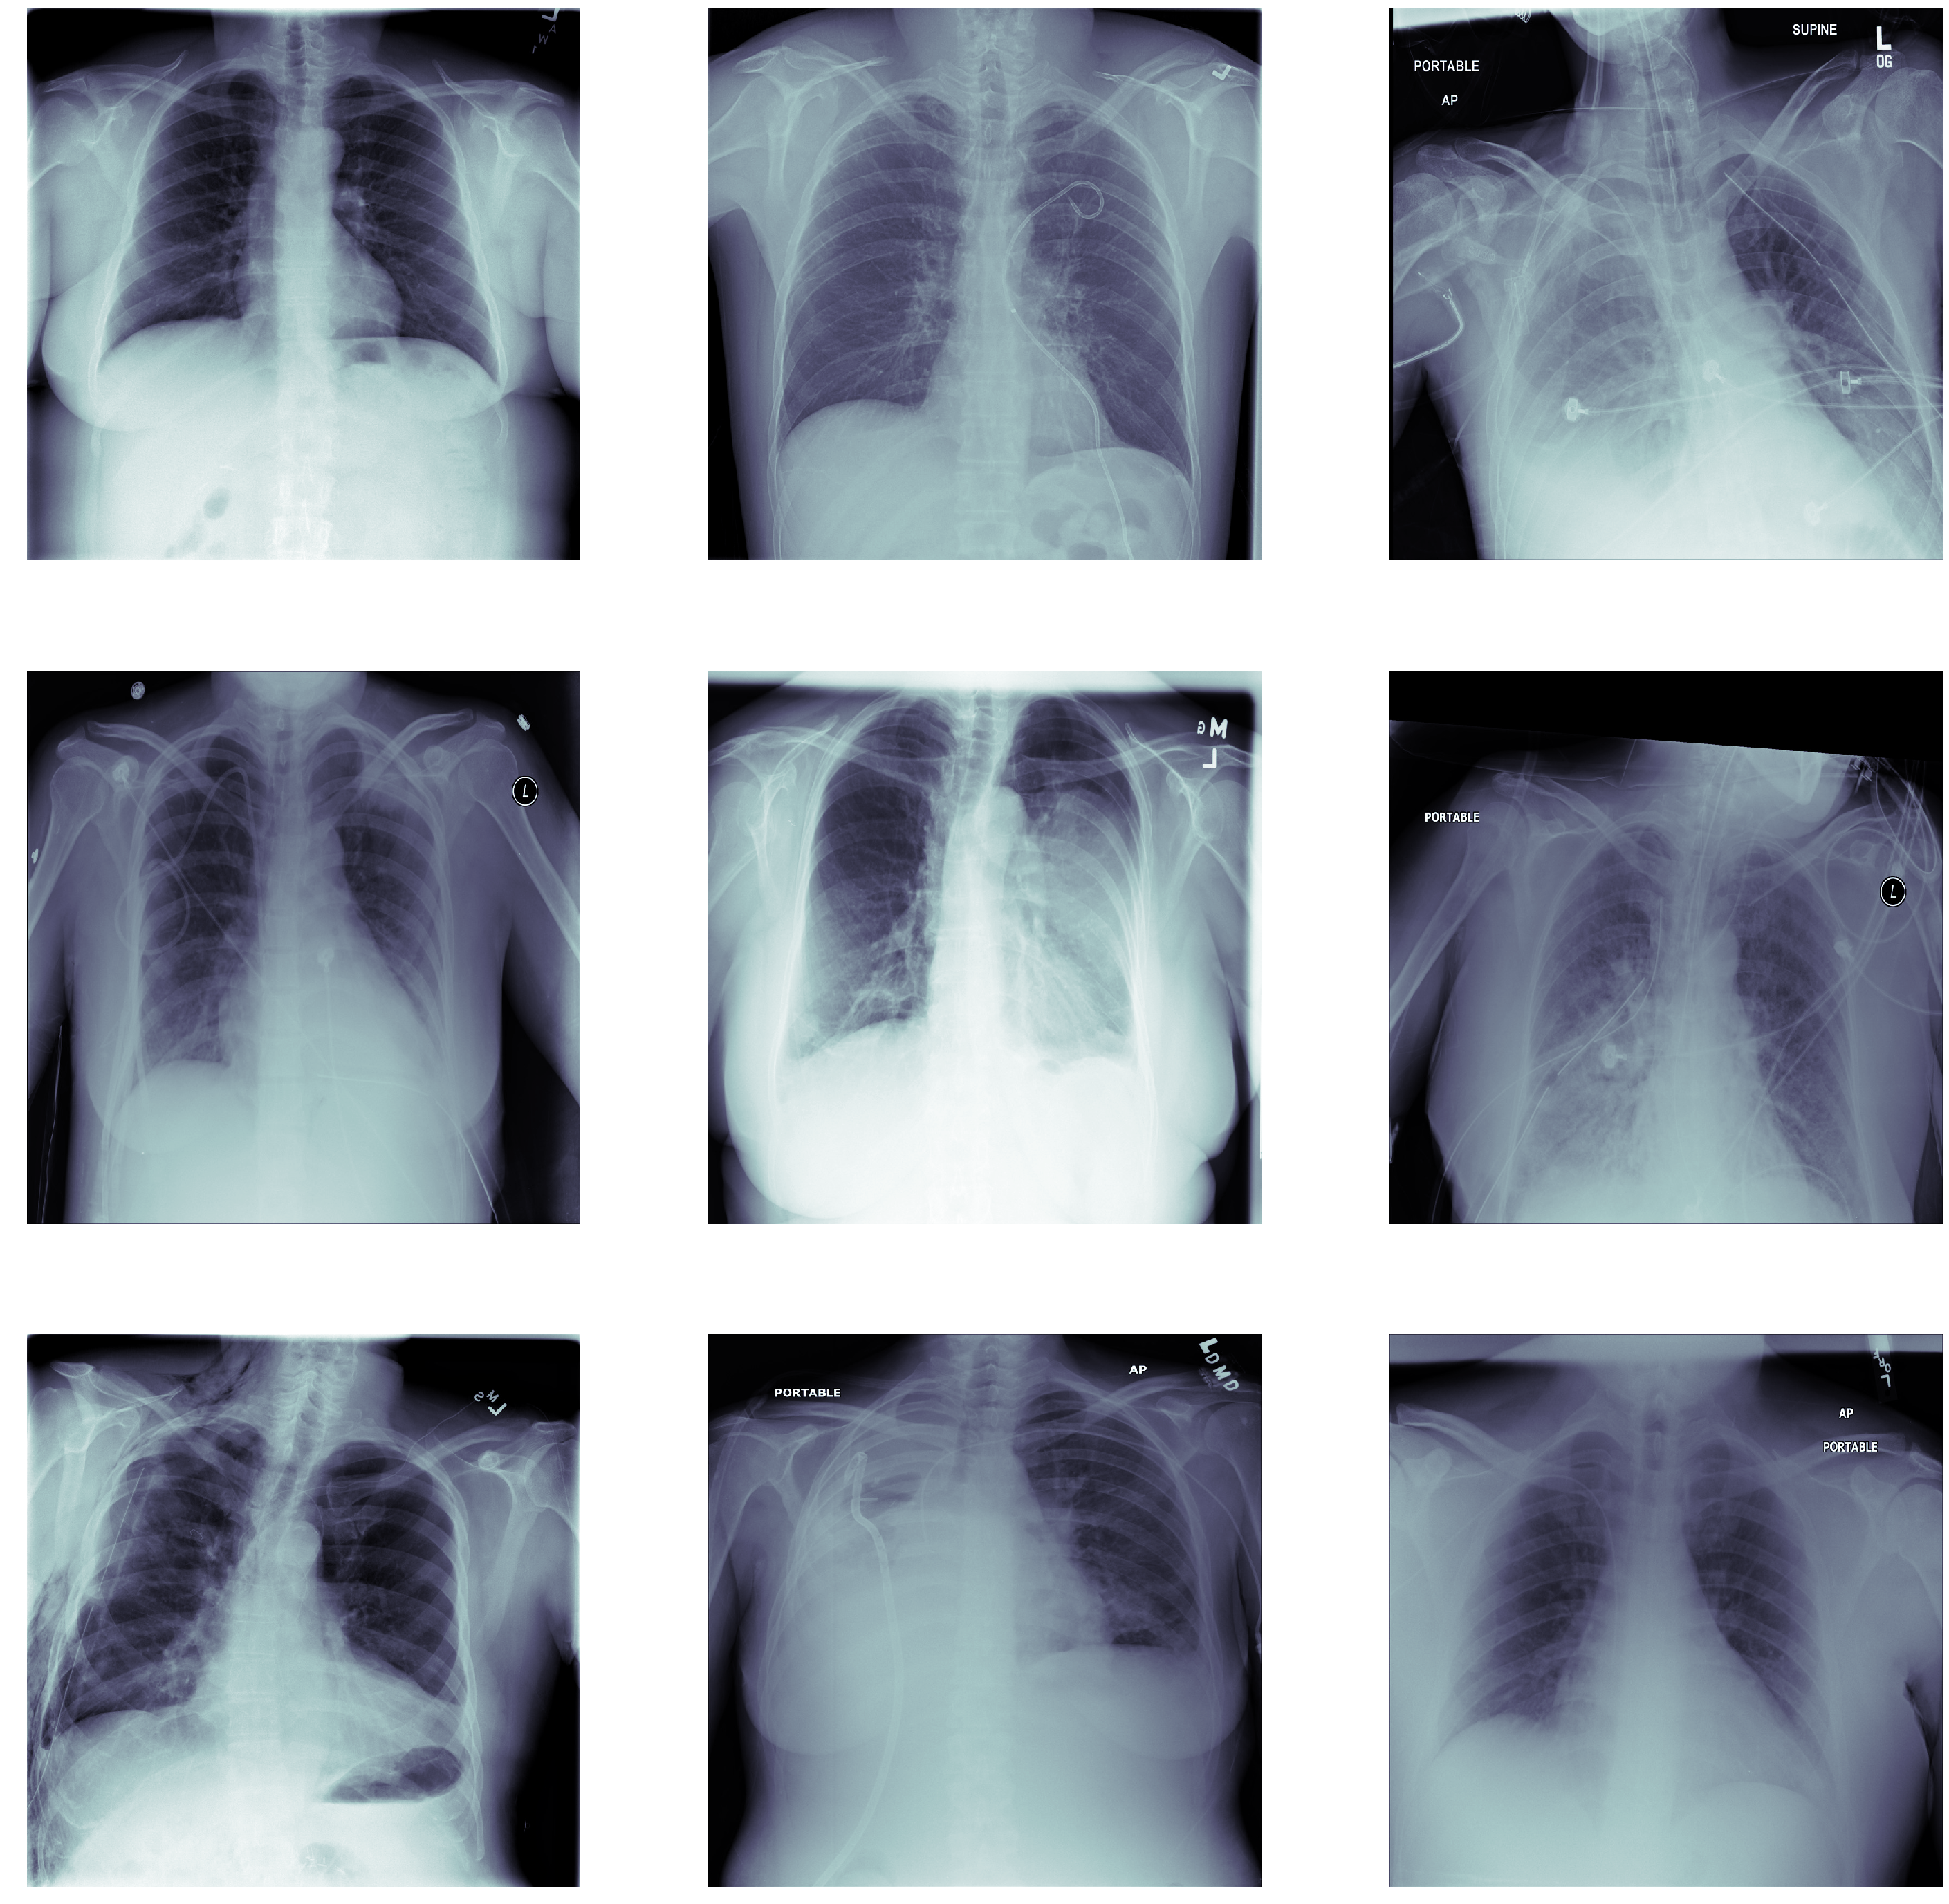

In [3]:
# Printing image samples

rows, columns = 3, 3
fig = plt.figure(figsize = (50, 50))

for i in range(1, columns * rows + 1):
    image_file = np.random.choice(test_set)
    img = pydicom.read_file(image_file).pixel_array
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='bone')
    plt.axis('off')
plt.show()


In [4]:
# Importing RLEs

rles = pd.read_csv(rles_path)

# Images have one or more annotations
rles_annotations = defaultdict(list)
for image_id, rle in zip(rles['ImageId'], rles[' EncodedPixels']):
    rles_annotations[image_id].append(rle)
    
rles = rles_annotations
annotated = {k: v for k, v in rles.items() if v[0] != ' -1' }
print("%d of %d images are annotated" % (len(annotated), len(rles)))


2379 of 10675 images are annotated


In [5]:
# Check for missing data(annotations).
print("Missing data: ", len(train_set) - len(rles))

Missing data:  0
